In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context(rc = {'figure.figsize':(12, 10), "font.size":15, "axes.labelsize":15}, font_scale=2)

In [2]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  0.25.3
Seaborn version:  0.9.0


Using the titanic dataset from kaggle

In [3]:
df = pd.read_csv("titanic-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)
Show the counts of observations in each categorical bin using bars.

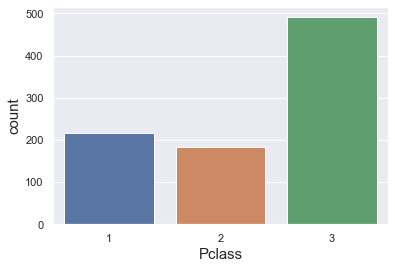

In [4]:
sns.countplot(x="Pclass", data=df);

Show value counts for two categorical variables:

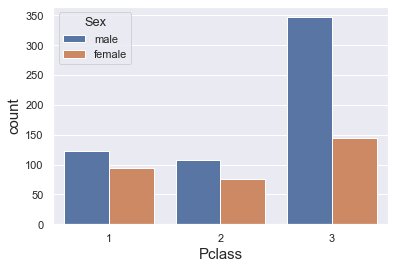

In [5]:
sns.countplot(x="Pclass", data=df, hue = 'Sex');

To plot the above graph horizontally

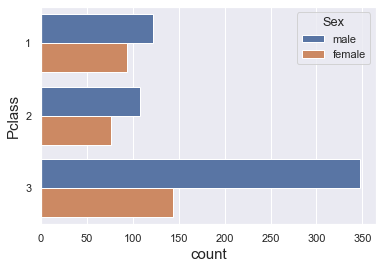

In [6]:
sns.countplot(y ="Pclass", data=df, hue = 'Sex');

Use [catplot()](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) to combine a __countplot()__ and a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid). This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets.

#### To change size of catplot(/factorplot.factorgrid)
You want to pass in the arguments 'size' or 'aspect' to the sns.factorplot() when constructing your plot.

- __Size/height__ will change the height, while maintaining the aspect ratio (so it will also also get wider if only size is changed.)

- __Aspect__ will change the width while keeping the height constant.

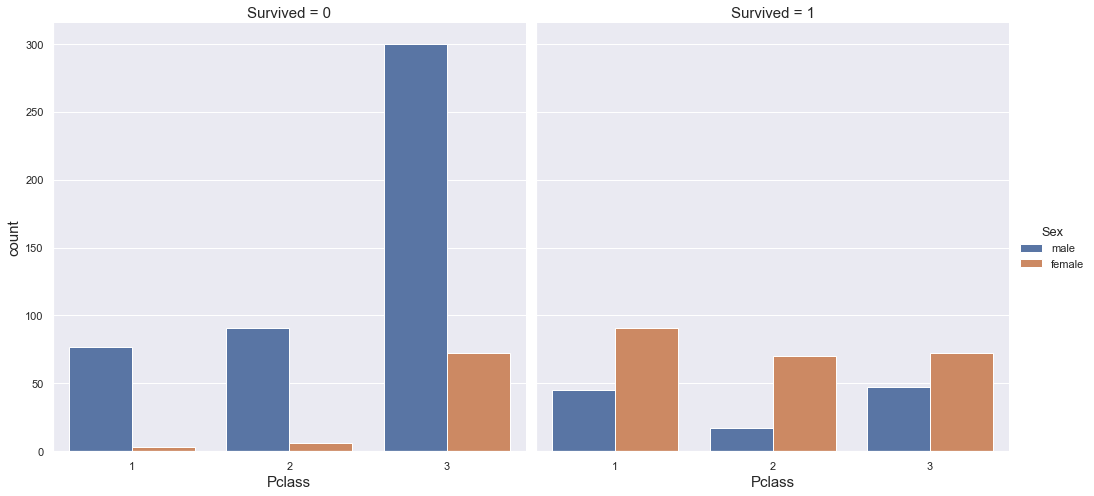

In [7]:
sns.catplot(data = df, x = "Pclass", hue = "Sex", col = "Survived", kind = 'count', height = 7);

***

## [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

In [8]:
df.loc[df.Pclass==1,'Age'].mean()

38.233440860215055

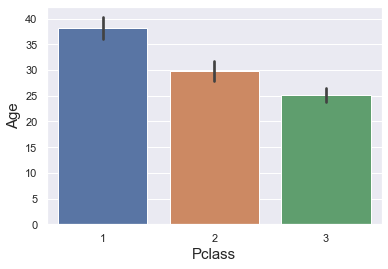

In [9]:
sns.barplot(data = df, x = "Pclass", y = "Age");

The height of the bars in the above graph represents mean.

To change the measure of central tendency from mean to median. 

In [10]:
df.loc[df.Pclass==1,'Age'].median()

37.0

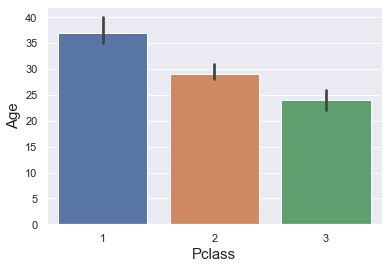

In [11]:
from numpy import median
sns.barplot(data = df, x = "Pclass", y = "Age", estimator = median);

Bargraphs which represent sum, change estimator to __sum__.

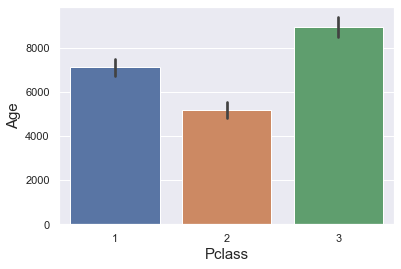

In [12]:
sns.barplot(data = df, x = "Pclass", y = "Age", estimator = sum);

Arrange the order of the bars by passing an explicit order.

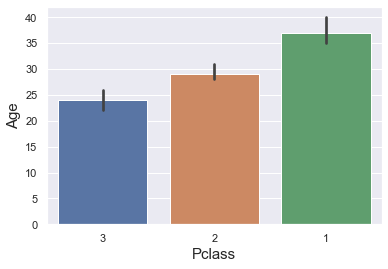

In [13]:
sns.barplot(data = df, x = "Pclass", y = "Age", estimator = median, order = [3,2,1]);

Show the standard error of the mean with the error bars:

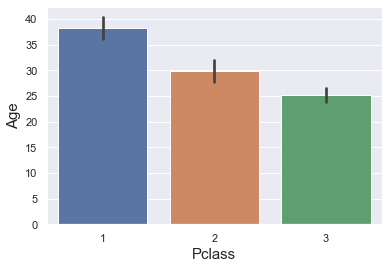

In [14]:
sns.barplot(data = df, x = "Pclass", y = "Age", ci = 95);

Show standard deviation of observations instead of a confidence interval:

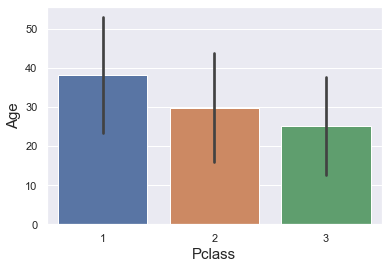

In [15]:
sns.barplot(data = df, x = "Pclass", y = "Age", ci = "sd");

Add “caps” to the error bars:

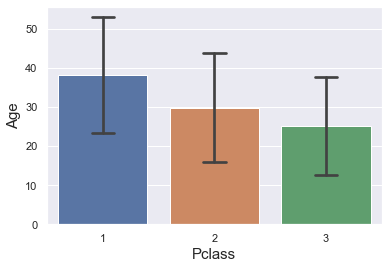

In [16]:
sns.barplot(data = df, x = "Pclass", y = "Age", ci = "sd", capsize = 0.2);

Using `hue` to distinguish for different categorical variable by plotting dodged bar graphs:

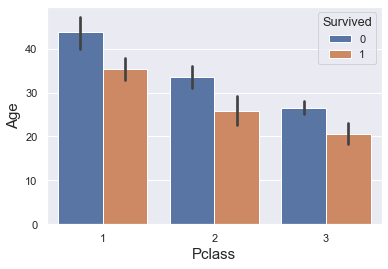

In [17]:
sns.barplot(x="Pclass", y="Age", hue="Survived", data=df);

Plotting `stacked bar graphs`:

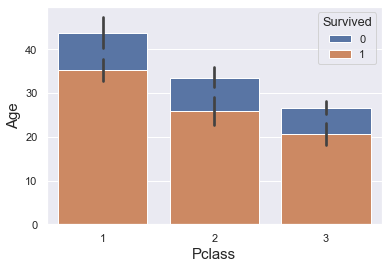

In [18]:
sns.barplot(x="Pclass", y="Age", hue="Survived", data=df, dodge = False);

Plotting %ge count of passenegers from each Pclass who survived in a stacked bar graphs.

In [19]:
temp = df.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack() * 100
temp

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


Text(0.5, 0, 'Survived %ge count')

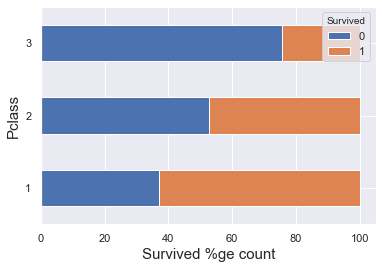

In [20]:
temp.plot(kind = 'barh', stacked = True);
plt.xlabel("Survived %ge count")

Plot all bars in a single color using `color = 'b'` and avoid the error bars:

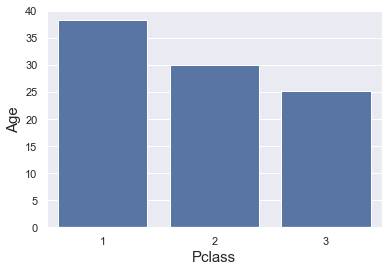

In [21]:
sns.barplot(data = df, x = "Pclass", y = "Age", ci = None, color = 'b');